<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/Titanic_Survival_Predictor(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

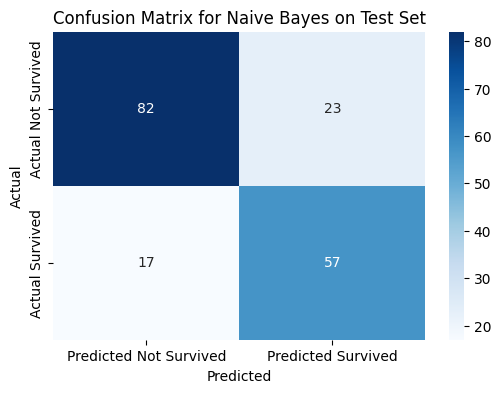


Classification Performance for Naive Bayes on Test Set:

   Metric  Not Survived  Survived  Accuracy
Precision      0.828283   0.71250  0.776536
   Recall      0.780952   0.77027  0.776536
 F1 Score      0.803922   0.74026  0.776536
  Support    105.000000  74.00000       NaN


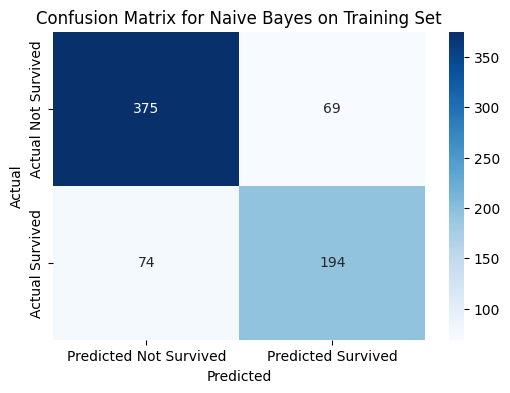


Classification Performance for Naive Bayes on Training Set:

   Metric  Not Survived   Survived  Accuracy
Precision      0.835189   0.737643  0.799157
   Recall      0.844595   0.723881  0.799157
 F1 Score      0.839866   0.730697  0.799157
  Support    444.000000 268.000000       NaN


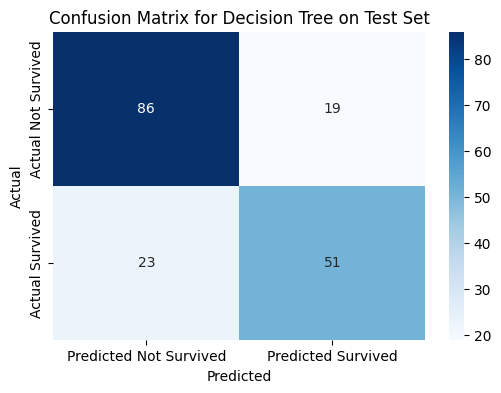


Classification Performance for Decision Tree on Test Set:

   Metric  Not Survived  Survived  Accuracy
Precision      0.788991  0.728571  0.765363
   Recall      0.819048  0.689189  0.765363
 F1 Score      0.803738  0.708333  0.765363
  Support    105.000000 74.000000       NaN


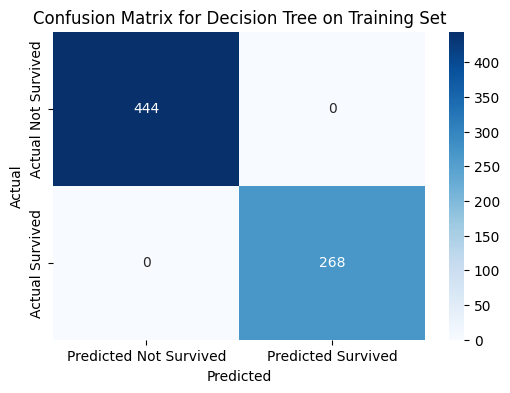


Classification Performance for Decision Tree on Training Set:

   Metric  Not Survived  Survived  Accuracy
Precision           1.0       1.0       1.0
   Recall           1.0       1.0       1.0
 F1 Score           1.0       1.0       1.0
  Support         444.0     268.0       NaN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Drop irrelevant columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Split the data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_nb_test = nb_model.predict(X_test)
y_pred_dt_test = dt_model.predict(X_test)
y_pred_nb_train = nb_model.predict(X_train)
y_pred_dt_train = dt_model.predict(X_train)

# Function to create confusion matrix and metrics
def create_confusion_matrix_and_metrics(y_true, y_pred, model_name, dataset_type):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=['Not Survived', 'Survived'], output_dict=True)

    # Display confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Survived', 'Predicted Survived'],
                yticklabels=['Actual Not Survived', 'Actual Survived'])
    plt.title(f'Confusion Matrix for {model_name} on {dataset_type} Set')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Extract metrics for each class
    class_0_metrics = report['Not Survived']
    class_1_metrics = report['Survived']

    # Create a dataframe for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1 Score', 'Support'],
        'Not Survived': [class_0_metrics['precision'], class_0_metrics['recall'], class_0_metrics['f1-score'], class_0_metrics['support']],
        'Survived': [class_1_metrics['precision'], class_1_metrics['recall'], class_1_metrics['f1-score'], class_1_metrics['support']],
        'Accuracy': [np.nan, np.nan, np.nan, np.nan]  # Placeholder for Accuracy
    })

    # Calculate and add accuracy to the dataframe
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    metrics_df.at[metrics_df.index[0], 'Accuracy'] = accuracy
    metrics_df.at[metrics_df.index[1], 'Accuracy'] = accuracy
    metrics_df.at[metrics_df.index[2], 'Accuracy'] = accuracy
    metrics_df.at[metrics_df.index[3], 'Accuracy'] = np.nan  # Accuracy is not a class-specific metric

    print(f"\nClassification Performance for {model_name} on {dataset_type} Set:\n")
    print(metrics_df.to_string(index=False))

# Analyze Naive Bayes performance on test and training sets
create_confusion_matrix_and_metrics(y_test, y_pred_nb_test, 'Naive Bayes', 'Test')
create_confusion_matrix_and_metrics(y_train, y_pred_nb_train, 'Naive Bayes', 'Training')

# Analyze Decision Tree performance on test and training sets
create_confusion_matrix_and_metrics(y_test, y_pred_dt_test, 'Decision Tree', 'Test')
create_confusion_matrix_and_metrics(y_train, y_pred_dt_train, 'Decision Tree', 'Training')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()

# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Drop irrelevant columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Split the data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)

# Train the models
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_nb_test = nb_model.predict(X_test)
y_pred_dt_test = dt_model.predict(X_test)
y_pred_nb_train = nb_model.predict(X_train)
y_pred_dt_train = dt_model.predict(X_train)

# Function to create performance metrics table
def create_performance_table(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    metrics_list = []
    for key in report.keys():
        if key not in ['accuracy', 'macro avg', 'weighted avg']:
            metrics_list.append({
                'Class': key,
                'Accuracy': report['accuracy'],
                'Precision': report[key]['precision'],
                'Recall': report[key]['recall'],
                'F1 Score': report[key]['f1-score']
            })

    metrics_df = pd.DataFrame(metrics_list)

    print(f"\n{model_name} Consolidated Performance Metrics Table\n")
    print(metrics_df.to_string(index=False))
    print("="*60)

# Generate performance tables for Naive Bayes on the test set
create_performance_table(y_test, y_pred_nb_test, 'Naive Bayes')

# Generate performance tables for Decision Tree on the test set
create_performance_table(y_test, y_pred_dt_test, 'Decision Tree')



Naive Bayes Consolidated Performance Metrics Table

Class  Accuracy  Precision   Recall  F1 Score
    0  0.776536   0.828283 0.780952  0.803922
    1  0.776536   0.712500 0.770270  0.740260

Decision Tree Consolidated Performance Metrics Table

Class  Accuracy  Precision   Recall  F1 Score
    0  0.765363   0.788991 0.819048  0.803738
    1  0.765363   0.728571 0.689189  0.708333
